<a href="https://colab.research.google.com/github/MahreenAthar/ObjectRecognition-Cifar10/blob/main/i191712_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

# Splitting data into train and test

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

## Checking shape of training and testing data

In [29]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Xy_test shape: ", y_test.shape)
# To check a sample image (from X_train) uncomment the line below
# X_train[0]
# To check a sample label (from y_train) uncomment the line below
# y_train[0]

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000,)
X_test shape:  (10000, 32, 32, 3)
Xy_test shape:  (10000, 1)


Checking values contained in the y_train. Here we see that y_train is actually a 2D array.

In [10]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

Now we don't want each y_train to be a 2D array, there's no need for this so we will reshape it and convert it into 1D array.

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

The output (above) shows that y_train now is a 1D array that consists of numbers ranging from 0-9. There values represent the class label (classLabels list in below cell).

### Defining an image displaying function.
This function displays the image and it's label. By default a random value from 0-50,000 is being passed to the function (since there are 50,000 images in the training data) but any index can be manually passed to the function. 

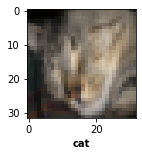

In [34]:
classLabels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# print(y_train[0], classLabels[y_train[0]])

def plotImageSample(X, y, index):
  plt.figure(figsize = (10, 2))
  plt.imshow(X[index])
  plt.xlabel(classLabels[y[index]], weight="bold")

randomImageNumber = np.random.randint(1, 50000)
plotImageSample(X_train, y_train, randomImageNumber)

### Normalizing RGB values
All RGB values range from 0-255, we wil be normalizing each pixel value by dividing it by 255 so all pixel values will range from 0-1.

In [37]:
X_train = X_train / 255
X_test = X_test / 255

In [38]:
X_train[0]

array([[[0.00090734, 0.00095348, 0.00096886],
        [0.00066128, 0.00070742, 0.00069204],
        [0.00076894, 0.00073818, 0.00066128],
        ...,
        [0.00242983, 0.00202999, 0.0016609 ],
        [0.00233756, 0.00192234, 0.00156863],
        [0.00227605, 0.00190696, 0.00158401]],

       [[0.00024606, 0.00030757, 0.00030757],
        [0.        , 0.        , 0.        ],
        [0.00027682, 0.00012303, 0.        ],
        ...,
        [0.00189158, 0.00135333, 0.00084583],
        [0.00183007, 0.00127643, 0.00076894],
        [0.0018762 , 0.00133795, 0.00087659]],

       [[0.00038447, 0.00036909, 0.00032295],
        [0.00024606, 0.00010765, 0.        ],
        [0.00075356, 0.00041522, 0.00012303],
        ...,
        [0.00181469, 0.00129181, 0.00076894],
        [0.00184544, 0.00129181, 0.00076894],
        [0.00167628, 0.00112265, 0.00064591]],

       ...,

       [[0.00319877, 0.00261438, 0.00147636],
        [0.00309112, 0.00235294, 0.00052288],
        [0.00304498, 0